In [1]:
import numpy as np
import matplotlib.pyplot as plt

学習データの生成

In [12]:
# データの個数
NUM_DATA = 10

# 正解の直線の傾きと切片を乱数で決定
a = np.random.uniform(-1, 1)
b = np.random.uniform(0, 1)

# 0~1の数字をNUM_DATA個の等差数列にする
x = np.linspace(0, 1, NUM_DATA)
# 乱数を生成する
noise = np.random.uniform(-0.03, 0.03, size = (NUM_DATA, ))
y = a * x + b + noise

print(f"a : {a}, b : {b}")
for i, (X, Y) in enumerate(zip(x, y)):
    print(f"{i + 1}番目のデータ, x : {X}, y : {Y}")

a : 0.670188872328175, b : 0.008073570554582243
1番目のデータ, x : 0.0, y : 0.02277023295590487
2番目のデータ, x : 0.1111111111111111, y : 0.06586396019745167
3番目のデータ, x : 0.2222222222222222, y : 0.1472616768982613
4番目のデータ, x : 0.3333333333333333, y : 0.2585614745049009
5番目のデータ, x : 0.4444444444444444, y : 0.3060464871376096
6番目のデータ, x : 0.5555555555555556, y : 0.36406330889716393
7番目のデータ, x : 0.6666666666666666, y : 0.43590012915737425
8番目のデータ, x : 0.7777777777777777, y : 0.530601051704964
9番目のデータ, x : 0.8888888888888888, y : 0.6281399512967065
10番目のデータ, x : 1.0, y : 0.6734356512768538


生成したデータを散布図にする

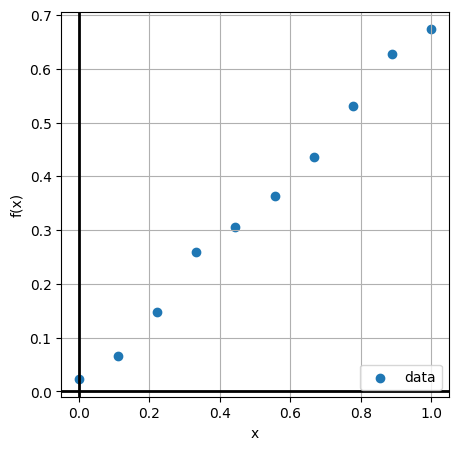

In [13]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()
# 散布図を描画
ax.scatter(x, y, label = "data")
ax.axhline(0, color = 'black', linewidth = 2)
ax.axvline(0, color = 'black', linewidth = 2)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
ax.grid()
plt.show()

ランダムな直線を描画する

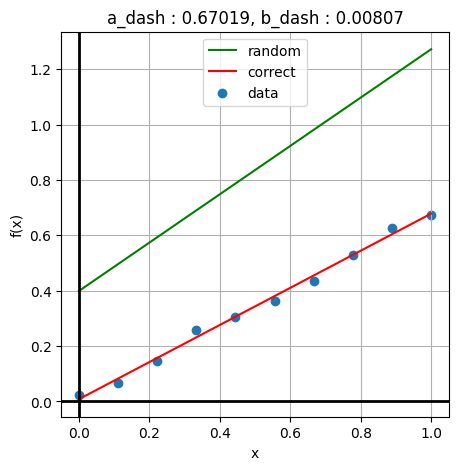

In [14]:
# 傾き，切片を乱数で決定
a_dash = np.random.uniform(-1, 1)
b_dash = np.random.uniform(0, 1)
y_dash = a_dash * x + b_dash

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()
# ランダムな直線を描画
ax.plot(x, y_dash, label = "random", color = "green")
# 正解の直線を描画
ax.plot(x, a * x + b, label = "correct", color = "red")
# 散布図を描画
ax.scatter(x, y, label = "data")
ax.axhline(0, color = 'black', linewidth = 2)
ax.axvline(0, color = 'black', linewidth = 2)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title(f"a_dash : {a:.5f}, b_dash : {b:.5f}")
ax.legend()
ax.grid()
plt.show()

ランダムな直線に対し平均二乗誤差を計算する

平均二乗誤差 : 0.13072460468910427


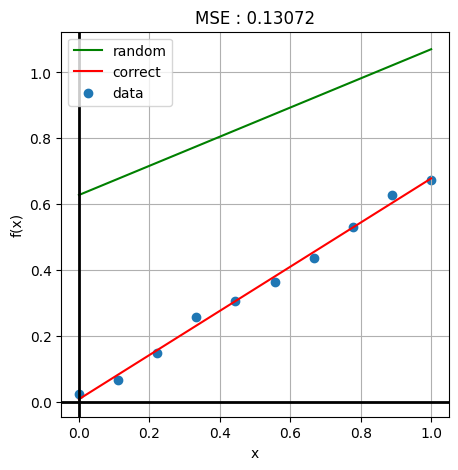

In [31]:
# 平均二乗誤差を計算する関数
def mean_squared_error(y_true : np.ndarray, y_pred : np.ndarray) -> np.float64:
    return np.average( (1 / 2) * np.square( y_true - y_pred ) )

# 傾き，切片を乱数で決定
a_dash = np.random.uniform(-1, 1)
b_dash = np.random.uniform(0, 1)
y_dash = a_dash * x + b_dash

# 平均二乗誤差
loss = mean_squared_error(y, y_dash)
print(f"平均二乗誤差 : {loss}")

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()
# ランダムな直線を描画
ax.plot(x, y_dash, label = "random", color = "green")
# 正解の直線を描画
ax.plot(x, a * x + b, label = "correct", color = "red")
# 散布図を描画
ax.scatter(x, y, label = "data")
ax.axhline(0, color = 'black', linewidth = 2)
ax.axvline(0, color = 'black', linewidth = 2)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
ax.grid()
ax.set_title(f"MSE : {loss:.5f}")
plt.show()

最適なパラメータを計算する

In [16]:
var_x = np.var(x)
# 分散共分散行列の1行目2列目の要素(σ_{xy})を取り出す
cov_xy = np.cov(x, y, bias = True)[0, 1]
avg_x = np.average(x)
avg_y = np.average(y)

a_dash = cov_xy / var_x
b_dash = avg_y - a_dash * avg_x

print(f"本来のa : {a}, 導き出したa : {a_dash}")
print(f"本来のb : {b}, 導き出したb : {b_dash}")

本来のa : 0.670188872328175, 導き出したa : 0.670835474309117
本来のb : 0.008073570554582243, 導き出したb : 0.007846655248160583


得られたパラメータから直線を描画する

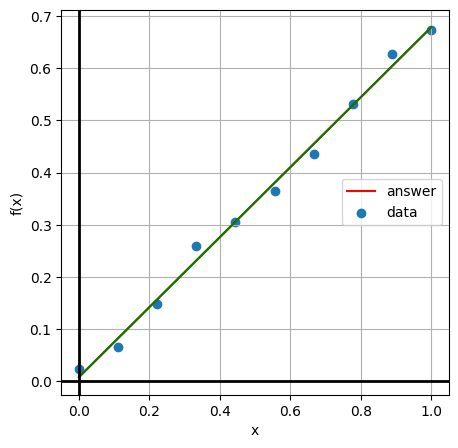

In [17]:
y_dash = a_dash * x + b_dash

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()
# 正解の直線を描画
ax.plot(x, a * x + b, label = "answer", color = "red")
# パラメータから直線を描画
ax.plot(x, y_dash, color = "green")
# 散布図を描画
ax.scatter(x, y, label = "data")
ax.axhline(0, color = 'black', linewidth = 2)
ax.axvline(0, color = 'black', linewidth = 2)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
ax.grid()
plt.show()

# 説明に使用するプログラム

In [18]:
import os
import shutil
from PIL import Image
from tqdm import tqdm

データの散布図と正解の直線を描画する

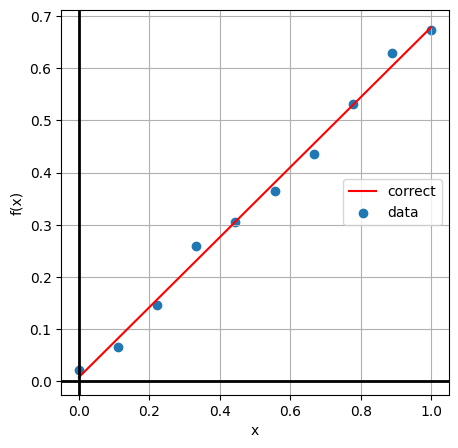

In [19]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()
# 正解の直線を描画
ax.plot(x, a * x + b, label = "correct", color = "red")
# 散布図を描画
ax.scatter(x, y, label = "data")
ax.axhline(0, color = 'black', linewidth = 2)
ax.axvline(0, color = 'black', linewidth = 2)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
ax.grid()
plt.show()

100it [00:42,  2.36it/s]


0.0001352162366657132 83 0.6767676767676769


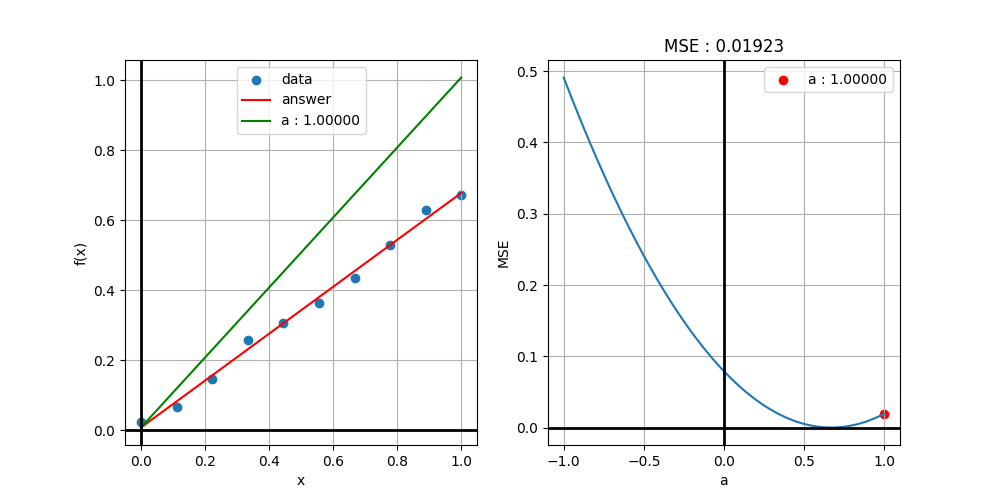

In [32]:
TMP_DIR = "tmp_dir/"
if os.path.exists(TMP_DIR):
    shutil.rmtree(TMP_DIR)
os.mkdir(TMP_DIR)

a_dashs = np.linspace(-1, 1, 100)
losses = list()
for A in a_dashs:
    y_dash = A * x + b
    losses.append( mean_squared_error(y, y_dash) )

frames = list()
for i, (A, L) in tqdm(enumerate(zip(a_dashs, losses))):
    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(x, y, label = "data")
    ax.plot(x, a * x + b, label = "answer", color = "red")
    ax.plot(x, A * x + b, label = f"a : {A:.5f}", color = "green")
    ax.axhline(0, color = 'black', linewidth = 2)
    ax.axvline(0, color = 'black', linewidth = 2)
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.legend()
    ax.grid()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(a_dashs, losses)
    ax.scatter(A, L, label = f"a : {A:.5f}", color = "red")
    ax.axhline(0, color = 'black', linewidth = 2)
    ax.axvline(0, color = 'black', linewidth = 2)
    ax.set_xlabel("a")
    ax.set_ylabel("MSE")
    ax.legend()
    ax.grid()
    ax.set_title(f"MSE : {L:.5f}")
    TMP_PATH = f"{TMP_DIR}{i:03}.png"
    plt.savefig(TMP_PATH)
    plt.close()

    frames.append( Image.open(TMP_PATH) )

frames[0].save('mean_squared_error_animation.gif', save_all = True,
               append_images = frames[1:], duration = 50, loop = 1)

print(min(losses), np.argmin(losses), a_dashs[np.argmin(losses)])
frames[np.argmin(losses)]

In [21]:
# ex)
print(np.array([[1, 2, 3, 4, 5],
                [6, 7, 8, 9, 10]]))
# OK!

# ex)
print(np.array([[1, 2, 3, 4, 5],
                [6, 7, 8]]))
# NG...

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [34]:
a = np.array([1, 2, 3])
print(a)
# => [1 2 3]
b = a + 1
print(b)
# => [2 3 4]
c = a * 2
print(c)
# => [2 4 6]
d = a * 2 + 1
print(d)
# => [3 5 7]

[1 2 3]
[2 3 4]
[2 4 6]
[3 5 7]


In [35]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
print(a)
# => [[1 2 3]
#     [4 5 6]]
b = a + np.array([[1],
                  [2]])
print(b)
# => [[2 3 4]
#     [6 7 8]]
c = a * np.array([7, 8, 9])
print(c)
# => [[ 7 16 27]
#     [28 40 54]]

[[1 2 3]
 [4 5 6]]
[[2 3 4]
 [6 7 8]]
[[ 7 16 27]
 [28 40 54]]
